In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# from https://rosettacode.org/wiki/Abelian_sandpile_model#Python
class AbelianSandpile:
    def __init__(self, size, ic, snn = False):
        """
        Initialize initial grid size (width) and initial starting amount ic

        if ic is a list, initializes with random initial conditions with parameters:
        [%percent of grid initiated, number of grains at each burst, variability in drop size: if 1 all are same size]
        """
        self.size = size
        self.grid = np.zeros((size,size), int)

        if type(ic) in [list, tuple]: #still have to implement var in drop size
            pcnt_on = ic[0]
            num_rand = int(size*size*pcnt_on)
            self.rand_loc = self.gen_rand_coords(num_rand)
            for coord in self.rand_loc:
                x, y = coord[0], coord[1]
                self.grid[x][y] = ic[1]

        else:
            i1, i2 = int(size/2 - 1), int(size/2)
            self.grid[i1:i2, i1:i2] = ic #so it starts somewhere near the center


    def gen_rand_coords(self, num_rand):
        """helper function to generate random coordinates"""
        rand_loc = []
        def recursive_gen():
            for i in np.arange(num_rand):
                rand_coord = list(np.random.randint(0,self.size,2))
                if len(rand_loc) == num_rand:
                    break
                if rand_coord not in rand_loc:
                    rand_loc.append(rand_coord)
                else:
                    recursive_gen()
        recursive_gen()
        return rand_loc

    def iterate(self, grid, save_evol):
        changed = False
        for i, row in enumerate(grid):
            for j, height in enumerate(row):
                if height > 3:
                    grid[i,j] -= 4

                    if i > 0:
                        grid[i - 1, j] += 1
                    if i < len(grid)-1:
                        grid[i + 1, j] += 1
                    if j > 0:
                        grid[i, j - 1] += 1
                    if j < len(grid)-1:
                        grid[i, j + 1] += 1

                    changed = True

        return grid, changed

    def simulate(self, save_evol):
        grid = self.grid.copy()
        t = 0
        while True:
            grid, changed = self.iterate(grid, save_evol)
            if not changed:
                return grid

    def run(self, save_evol = False):
        """save_evol saves each time point.  if snn, does this automatically"""
        final_grid = self.simulate(save_evol)
        plt.figure(figsize=(12,8))
        plt.subplot(1,2,1)
        plt.gray()
        plt.imshow(self.grid)
        plt.subplot(1,2,2)
        plt.gray()
        plt.imshow(final_grid)
        plt.show()

        return final_grid

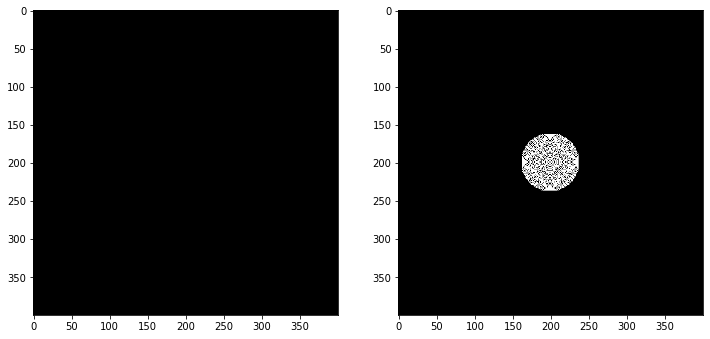

In [10]:
sandy = AbelianSandpile(400, 10000)
x = sandy.run()